In [125]:
filename = 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143/D20170821-T095435.raw'

In [127]:
!wget https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143/OOI-D20170821-T095435.raw 

--2019-02-17 11:01:49--  https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143/OOI-D20170821-T095435.raw
Resolving rawdata.oceanobservatories.org (rawdata.oceanobservatories.org)... 128.6.240.153
Connecting to rawdata.oceanobservatories.org (rawdata.oceanobservatories.org)|128.6.240.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52436316 (50M) [text/plain]
Saving to: ‘OOI-D20170821-T095435.raw’

OOI-D20170821-T0954 100%[===================>]  50.01M  15.1MB/s    in 3.3s    

2019-02-17 11:01:53 (15.1 MB/s) - ‘OOI-D20170821-T095435.raw’ saved [52436316/52436316]



In [10]:
filename = 'echopype/data/DY1801_EK60-D20180211-T164025.raw'

In [128]:
filename = 'OOI-D20170821-T095435.raw'
#filename = 'OOI-D20190114-T000000.raw'

In [129]:
# import as part of a submodule
from echopype.convert import ConvertEK60
data_tmp = ConvertEK60(filename)
data_tmp.raw2nc()
os.remove(filename)

11:02:14  converting file: OOI-D20170821-T095435.raw


In [130]:
from echopype.model import EchoData
data = EchoData(filename[:-4]+'.nc')
data.calibrate()  # Calibration and echo-integration
data.remove_noise(save=True)  # Save denoised Sv to FILENAME_Sv_clean.nc
data.get_MVBS(save=True)

11:02:20  saving calibrated Sv to OOI-D20170821-T095435_Sv.nc
11:02:27  saving denoised Sv to OOI-D20170821-T095435_Sv_clean.nc
11:02:28  saving MVBS to OOI-D20170821-T095435_MVBS.nc


In [131]:
%matplotlib inline

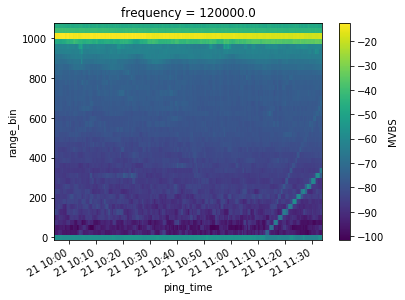

In [137]:
data.MVBS.MVBS.sel(frequency=120000).plot(x='ping_time')

In [133]:
data.MVBS.MVBS

<xarray.DataArray 'MVBS' (frequency: 3, ping_time: 198, range_bin: 42)>
array([[[-57.37524 , -95.938428, ..., -39.658065, -47.329628],
        [-57.131814, -94.873124, ..., -39.703096, -47.49445 ],
        ...,
        [-56.001157, -96.140064, ..., -43.380402, -48.673288],
        [-59.250988, -97.810051, ..., -44.168917, -49.48112 ]],

       [[-47.848412, -86.944528, ..., -54.514711, -60.984743],
        [-47.851804, -86.91608 , ..., -54.250179, -61.168967],
        ...,
        [-48.129452, -87.010046, ..., -59.322432, -63.114164],
        [-48.131897, -87.055246, ..., -59.791259, -63.05935 ]],

       [[-75.58115 , -89.824227, ..., -47.192334, -52.260031],
        [-75.895989, -88.941745, ..., -47.602949, -52.535779],
        ...,
        [-81.768079, -90.471665, ..., -47.986262, -52.389707],
        [-81.497534, -89.541912, ..., -48.380102, -54.085915]]])
Coordinates:
  * frequency  (frequency) float32 120000.0 38000.0 200000.0
  * ping_time  (ping_time) datetime64[ns] 2017-08-21T

**Processing Multiple Files**

In [17]:
!conda install --yes beautifulsoup4

Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt



In [84]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [85]:
path = 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143/'

In [86]:
response = urlopen(path)
soup = BeautifulSoup(response.read(), "html.parser")

In [87]:
# urls = []
# for item in soup.find_all(text=True):
#    if '.raw' in item:
#        urls.append(path+'/'+item)        

In [88]:
urls = [path+'/'+item for item in soup.find_all(text=True) if '.raw' in item]

In [89]:
# urls

In [90]:
from datetime import datetime

Provide range:

In [91]:
start_time = '20170813-T013841'
end_time = '20170814-T013841'

In [92]:
# convert the times to datetime format
start_datetime = datetime.strptime(start_time,'%Y%m%d-T%H%M%S')
end_datetime = datetime.strptime(end_time,'%Y%m%d-T%H%M%S')

In [93]:
# function to check if a date is in the date range
def in_range(date_str, start_time, end_time):
    date_str = datetime.strptime(date_str,'%Y%m%d-T%H%M%S')
    true = date_str >= start_datetime and date_str <= end_datetime
    return(true)
    

In [94]:
# identify the list of urls in range
range_urls = []
for url in urls: 
    date_str = url[-20:-4]
    if in_range(date_str, start_time, end_time):
        range_urls.append(url)
        

In [95]:
range_urls

['https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143//OOI-D20170813-T013901.raw',
 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143//OOI-D20170813-T031803.raw',
 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143//OOI-D20170813-T045704.raw',
 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143//OOI-D20170813-T063608.raw',
 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143//OOI-D20170813-T081511.raw',
 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143//OOI-D20170813-T095412.raw',
 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143//OOI-D20170813-T113314.raw',
 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143//OOI-D20170813-T131215.raw',
 'https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143//OO

In [71]:
rawnames = [url.split('//')[-1] for url in range_urls]

In [72]:
#ls

In [96]:
import os

In [ ]:
# Download the files
import requests
rawnames = []
for url in range_urls:
    r = requests.get(url, allow_redirects=True)
    rawnames.append(url.split('//')[-1])
    open(url.split('//')[-1], 'wb').write(r.content)

In [ ]:
!pip install echopype
    

In [76]:
# import as part of a submodule
from echopype.convert import ConvertEK60
for filename in rawnames:
    data_tmp = ConvertEK60(filename)
    data_tmp.raw2nc()
    os.remove(filename)

09:18:33  converting file: OOI-D20170813-T013901.raw
09:18:36  converting file: OOI-D20170813-T031803.raw
09:18:39  converting file: OOI-D20170813-T045704.raw
09:18:41  converting file: OOI-D20170813-T063608.raw
09:18:44  converting file: OOI-D20170813-T081511.raw
09:18:47  converting file: OOI-D20170813-T095412.raw
09:18:49  converting file: OOI-D20170813-T113314.raw
09:18:52  converting file: OOI-D20170813-T131215.raw
09:18:54  converting file: OOI-D20170813-T145121.raw
09:18:57  converting file: OOI-D20170813-T163023.raw
09:19:00  converting file: OOI-D20170813-T180931.raw
09:19:02  converting file: OOI-D20170813-T194832.raw
09:19:05  converting file: OOI-D20170813-T212736.raw
09:19:07  converting file: OOI-D20170813-T230639.raw
09:19:08  converting file: OOI-D20170814-T000000.raw
09:19:11  converting file: OOI-D20170814-T013902.raw
09:19:14  converting file: OOI-D20170814-T031804.raw
09:19:17  converting file: OOI-D20170814-T045706.raw
09:19:19  converting file: OOI-D20170814-T0636

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
#ls

In [107]:
# calibrate and denoise
from echopype.model import EchoData

for filename in rawnames[7:]:

    data = EchoData(filename[:-4]+'.nc')
    data.calibrate()  # Calibration and echo-integration
    data.remove_noise(save=False)  # Save denoised Sv to FILENAME_Sv_clean.nc
    data.get_MVBS(save=True)
    os.remove(filename[:-4]+'.nc')
    os.remove(filename[:-4]+'_Sv.nc')

10:36:58  saving calibrated Sv to OOI-D20170813-T131215_Sv.nc
10:37:06  saving MVBS to OOI-D20170813-T131215_MVBS.nc
10:37:06  saving calibrated Sv to OOI-D20170813-T145121_Sv.nc
10:37:14  saving MVBS to OOI-D20170813-T145121_MVBS.nc
10:37:15  saving calibrated Sv to OOI-D20170813-T163023_Sv.nc
10:37:23  saving MVBS to OOI-D20170813-T163023_MVBS.nc
10:37:24  saving calibrated Sv to OOI-D20170813-T180931_Sv.nc
10:37:32  saving MVBS to OOI-D20170813-T180931_MVBS.nc
10:37:33  saving calibrated Sv to OOI-D20170813-T194832_Sv.nc
10:37:40  saving MVBS to OOI-D20170813-T194832_MVBS.nc
10:37:41  saving calibrated Sv to OOI-D20170813-T212736_Sv.nc
10:37:49  saving MVBS to OOI-D20170813-T212736_MVBS.nc
10:37:49  saving calibrated Sv to OOI-D20170813-T230639_Sv.nc
10:37:53  saving MVBS to OOI-D20170813-T230639_MVBS.nc
10:37:54  saving calibrated Sv to OOI-D20170814-T000000_Sv.nc
10:38:02  saving MVBS to OOI-D20170814-T000000_MVBS.nc
10:38:02  saving calibrated Sv to OOI-D20170814-T013902_Sv.nc
10

FileNotFoundError: [Errno 2] No such file or directory: b'/home/jovyan/OOI-D20170815-T000000.nc'

In [22]:
!conda install --yes dask

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.6.4

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda

  added / updated specs: 
    - dask


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libtiff-4.0.10             |    h648cc4a_1001         592 KB  conda-forge
    heapdict-1.0.0             |        py36_1000           7 KB  conda-forge
    msgpack-python-0.6.1       |   py36h6bb024c_0          89 KB  conda-forge
    toolz-0.9.0                |             py_1          42 KB  conda-forge
    distributed-1.25.3         |           py36_0         820 KB  conda-forge
    sortedcontainers-2.1.0     |             py_0          25 KB  conda-forge
    cloudpickle-0.7.0          |             py_0          17 KB  conda-forge
    psutil-5.5.0  

In [ ]:
import xarray as xr

In [108]:
res = xr.open_mfdataset('*MVBS.nc')

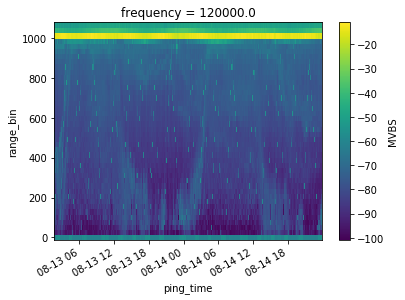

In [110]:
res.MVBS.sel(frequency=120000).plot(x='ping_time')